# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB


## Introduction and Learning Goals

In this lab, we will explore classification using the K-Nearest Neighbors approach. We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.

---

En este laboratorio, exploraremos la clasificación mediante el enfoque de K-Vecinos Más Cercanos. Utilizaremos un conjunto de datos de pérdida de clientes del sector de las telecomunicaciones, que incluye datos como el uso de llamadas de larga distancia, el uso de datos, los ingresos mensuales, los tipos de ofertas y otros servicios adquiridos. Los datos, basados ​​en una empresa de telecomunicaciones ficticia, incluyen varios archivos de Excel combinados que están disponibles en los materiales del curso. Utilizaremos el subconjunto de clientes con cuentas telefónicas. Dado que los datos incluyen una combinación de variables numéricas, categóricas y ordinales, los cargaremos y realizaremos un preprocesamiento. Posteriormente, utilizaremos K-Vecinos Más Cercanos para predecir las tasas de pérdida de clientes.

Al finalizar este laboratorio, comprenderá cómo preprocesar diversas variables para aplicar el algoritmo de K-Vecinos Más Cercanos, cómo elegir K y cómo evaluar el rendimiento del modelo.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

## Question 1

* We begin by importing the data. Examine the columns and data.
* Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
* Begin by taking an initial look at the data, including both numeric and non-numeric features.


In [3]:
### BEGIN SOLUTION

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [4]:
round(df.describe(),2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Question 2

* Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric.  The non-numeric features will need to be encoded using methods we have discussed in the course.
* Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables. 
* Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
* For the other categorical variables, examine their values to determine which may be encoded ordinally.
  
---

* Identifique qué variables son binarias, categóricas y no ordinales, categóricas y ordinales, y numéricas. Las características no numéricas deberán codificarse utilizando los métodos que hemos explicado en el curso.
* Comience por identificar el número de valores únicos que toma cada variable y luego cree variables de lista para las variables categóricas, numéricas, binarias y ordinales.
* Tenga en cuenta que la variable "meses" puede considerarse numérica, pero puede ser más conveniente transformarla en una variable ordinal.
* Para las demás variables categóricas, examine sus valores para determinar cuáles pueden codificarse ordinalmente.

In [5]:
### BEGIN SOLUTION
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


In [6]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

In [7]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['months', 'contract', 'satisfaction']

In [8]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['months', [0.0, 0.25, 0.5, 1.0, 0.75]],
 ['contract', [0.0, 0.5, 1.0]],
 ['satisfaction', [0.5, 0.25, 0.0, 0.75, 1.0]]]

In [12]:
ordinal_variables = ['contract', 'satisfaction']

In [13]:
df['months'].unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

In [14]:
ordinal_variables.append('months')

In [15]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<Axes: title={'center': 'monthly'}>,
        <Axes: title={'center': 'gb_mon'}>]], dtype=object)

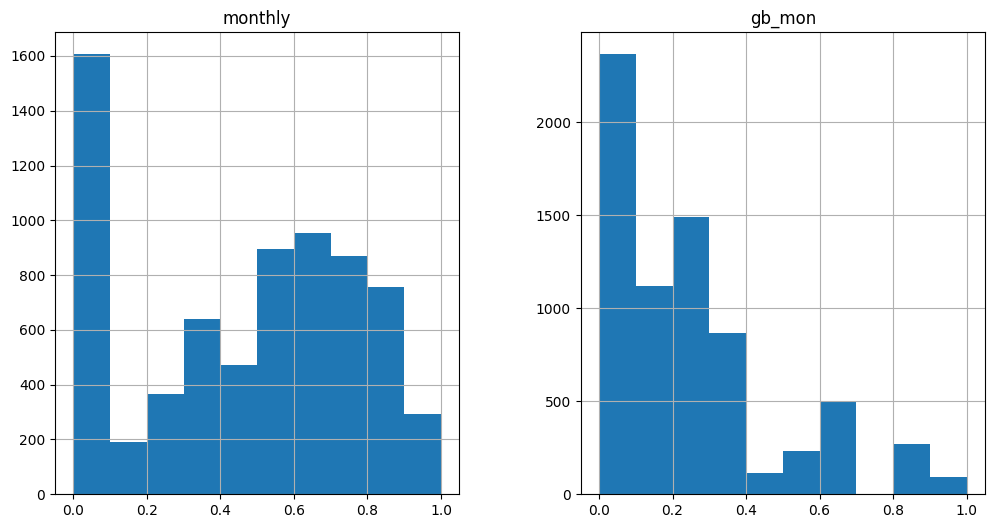

In [16]:
df[numeric_variables].hist(figsize=(12, 6))

In [17]:
df['months'] = pd.cut(df['months'], bins=5)
### END SOLUTION

### **Resumen: Laboratorio sobre K-Nearest Neighbors (KNN)**  

Este laboratorio se enfoca en aplicar el algoritmo **K-Nearest Neighbors (KNN)** para predecir la **pérdida de clientes** en una empresa de telecomunicaciones.  

---

### **📌 Objetivos del laboratorio**  
1. **Cargar y explorar los datos** sobre clientes, incluyendo variables como uso de datos, ingresos mensuales y satisfacción.  
2. **Preprocesar los datos**, clasificando las variables en **numéricas, categóricas, binarias y ordinales**.  
3. **Codificar las variables categóricas y escalar los datos** para adaptarlos al modelo KNN.  
4. **Seleccionar un valor adecuado para \( K \)** y evaluar el rendimiento del modelo.  

---

### **📊 Procesamiento de los datos**  
🔹 **Exploración inicial**  
- Se cargan los datos y se eliminan columnas irrelevantes.  
- Se analiza la distribución de variables clave como el uso de datos y los pagos mensuales.  
- Se observa que la pérdida de clientes ocurre en **aproximadamente el 27% de los casos**.  

🔹 **Clasificación de variables**  
- **Numéricas**: Pagos mensuales y gigabytes utilizados.  
- **Binarias**: Variables con solo 2 valores posibles (ej. ¿tiene contrato o no?).  
- **Categóricas**: Variables con más de 2 valores, como el tipo de internet.  
- **Ordinales**: Variables con un orden lógico, como la satisfacción del cliente (escala 1-5) y el tipo de contrato (mensual, anual, etc.).  

🔹 **Codificación y normalización**  
- Se convierten variables categóricas en **valores numéricos** (ej. 0 y 1).  
- Se agrupan los meses de servicio en **5 rangos distintos** mediante binning.  
- Se escalan los datos para mejorar la efectividad del modelo KNN.  

---

### **📌 Próximos pasos**  
En la siguiente sección, se implementará el algoritmo **K-Nearest Neighbors**, ajustando los hiperparámetros y evaluando el modelo con métricas como **F1-Score** y **error rate**. 🚀

## Question 3
* Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data. 
* Scale the data using one of the scaling methods discussed in the course.
* Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'

---

* Una vez configuradas las variables, recuerde que el algoritmo de los K vecinos más cercanos utiliza la distancia y, por lo tanto, requiere datos escalados.
* Escale los datos utilizando uno de los métodos de escalado descritos en el curso.
* Guarde el marco de datos procesado como un archivo separado por comas: 'churndata_processed.csv'


In [20]:
### BEGIN SOLUTION
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [21]:
lb, le = LabelBinarizer(), LabelEncoder()

In [22]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [23]:
df[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


In [24]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [25]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [26]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,1.734204,1.592924,0.0,0.000000,1.000000,3.000000,4.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.754792,0.848468,0.0,0.000000,0.000000,2.000000,2.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [29]:
for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])

In [30]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


In [31]:
### END SOLUTION

# Save a copy of the processed data for later use
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)

### **Resumen: Preprocesamiento de Datos para K-Nearest Neighbors (KNN)**  

En esta sección, se realiza el **preprocesamiento de datos** antes de aplicar el algoritmo **K-Nearest Neighbors (KNN)**. Se enfocan en **codificación de variables, escalado de datos y almacenamiento del conjunto preprocesado**.  

---

### **📌 Pasos del Preprocesamiento**  

1️⃣ **Codificación de Variables**  
- **Ordinales** (ej. contrato, satisfacción, meses de servicio) → Se transforman en valores numéricos usando `LabelEncoder`.  
- **Binarias** (variables con solo 2 valores) → Se convierten en 0 y 1 con `LabelBinarizer`.  
- **Categóricas no binarias** → Se convierten en variables dummies con `pd.get_dummies()`, eliminando una categoría para evitar multicolinealidad (`drop_first=True`).  

2️⃣ **Escalado de Datos**  
- Se usa **`MinMaxScaler`** para normalizar las variables ordinales y numéricas a un rango entre **0 y 1**.  
- Esto previene que valores con rangos amplios (ej. pagos mensuales) afecten el cálculo de distancias en KNN.  

3️⃣ **Guardado de Datos Preprocesados**  
- Se guarda el **DataFrame transformado** en un archivo CSV (`.to_csv()`) para evitar repetir el preprocesamiento en futuras ejecuciones.  

---

### **📌 Conclusión**  
Este preprocesamiento asegura que los datos sean adecuados para KNN, evitando sesgos en la medición de distancias. En la siguiente sección, se implementará **KNN con `train_test_split`** para evaluar la predicción de la pérdida de clientes. 🚀

## Question 4
* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix.
  
---

* Ahora que los datos están codificados y escalados, separe las características (X) del objetivo (y, churn_value).
* Divida la muestra en muestras de entrenamiento y de prueba; la muestra de prueba representa el 40 % de las observaciones.
* Estime un modelo de K vecinos más cercanos, utilizando K=3.
* Examine la precisión, la recuperación, la puntuación F-1 y la exactitud de la clasificación.
* Utilice un gráfico para ilustrar la matriz de confusión.

In [34]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [35]:
# Set up X and y variables
y, X = df['churn_value'], df.drop(columns='churn_value')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

    accuracy                           0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy score:  0.86
F1 Score:  0.74


Text(0.5, 102.72222222222219, 'Ground Truth')

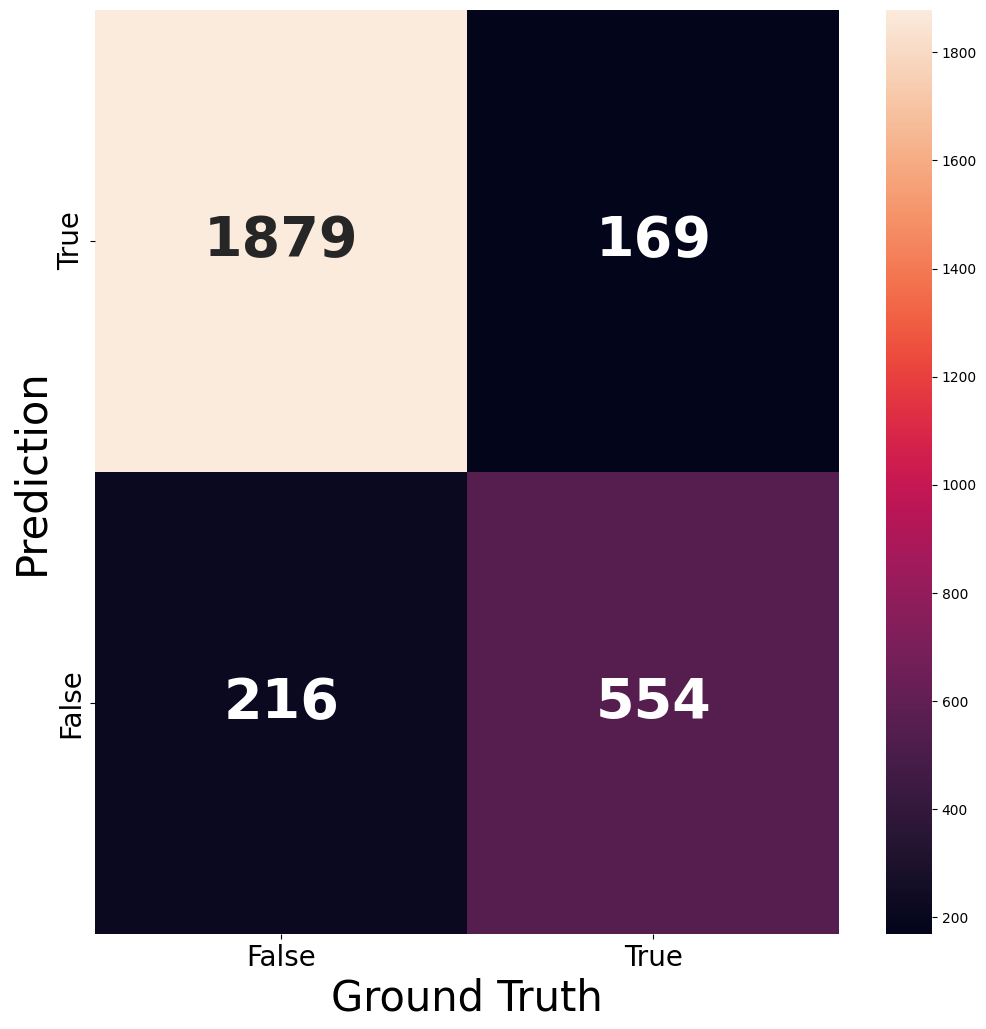

In [38]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=20);
ax.set_yticklabels(labels[::-1], fontsize=20);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

## Question 5
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
* This time, use K=5 and weight the results by distance.
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix. 

---

* Utilizando la misma división de muestras de entrenamiento y de prueba, estime otro modelo de K-Vecinos Más Próximos.
* Esta vez, utilice K=5 y pondere los resultados por distancia.
* Nuevamente, examine la Precisión, la Recall, la Puntuación F-1 y la Exactitud de la clasificación, y visualice la Matriz de Confusión.

In [39]:
### BEGIN SOLUTION
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2048
           1       0.78      0.74      0.76       770

    accuracy                           0.87      2818
   macro avg       0.84      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score:  0.87
F1 Score:  0.76


Text(0.5, 102.72222222222219, 'Ground Truth')

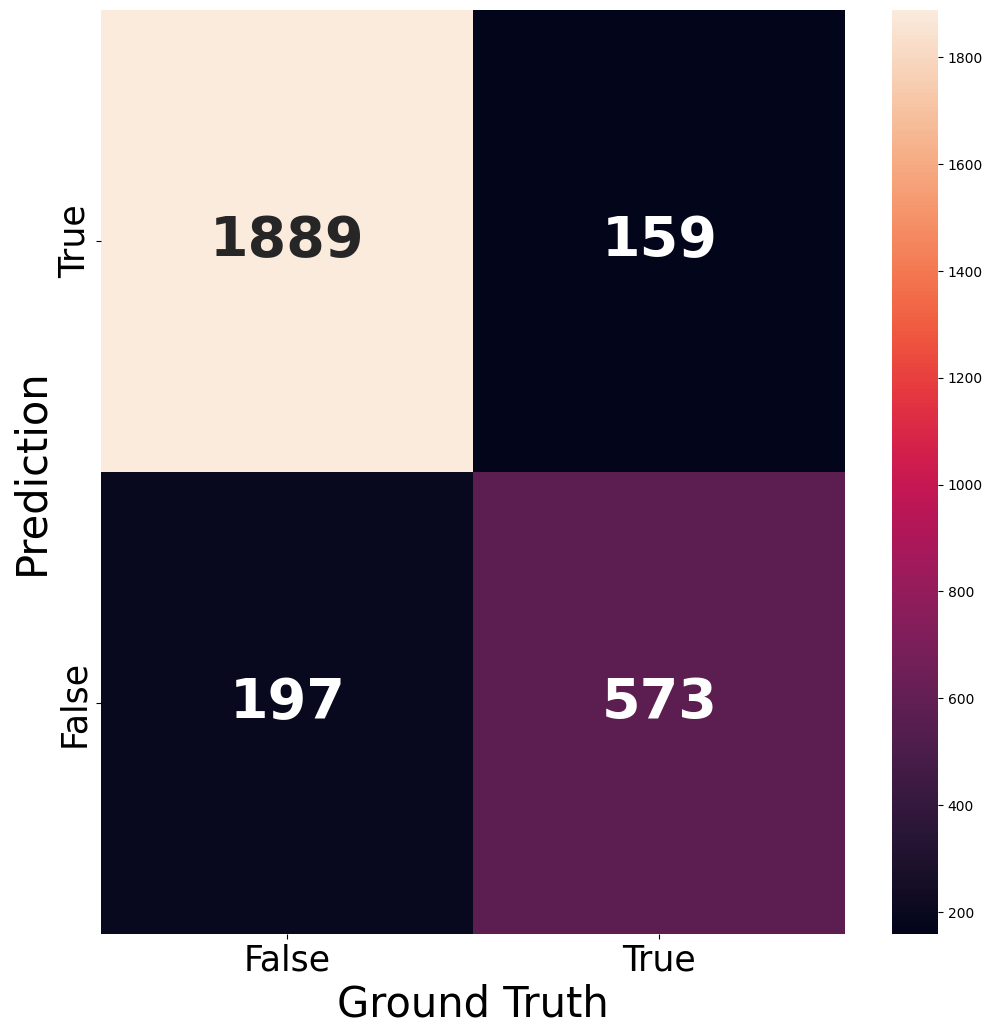

In [40]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

## Question 6
* To determine the right value for K, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?

---

* Para determinar el valor correcto de K, examine los resultados para valores de K de 1 a 40.
* En esta ocasión, concéntrese en dos medidas: la puntuación F-1 y la tasa de error (1-Precisión).
* Genere gráficos que representen cada una de estas medidas en función de K.
* ¿Qué sugieren estos gráficos sobre el valor óptimo de K?

In [41]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

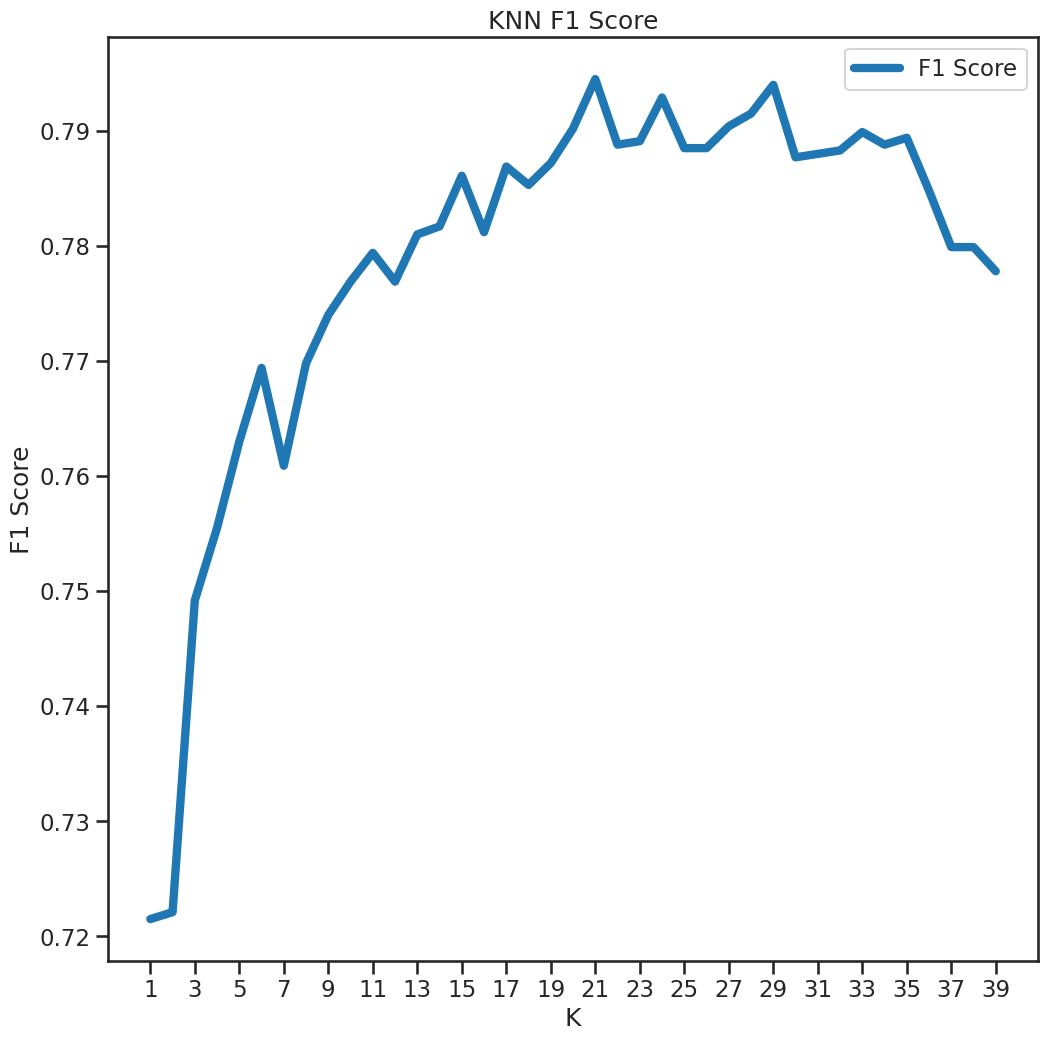

In [42]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

El gráfico muestra la **F1-Score** en función del valor de \( K \) en el algoritmo **K-Nearest Neighbors (KNN)**.

### **📌 Interpretación del gráfico:**
1. **Eje X (K)**: Representa los valores de \( K \) utilizados en el modelo, desde 1 hasta 40.
2. **Eje Y (F1 Score)**: Representa el **F1-Score**, que mide el equilibrio entre **precisión y recall** en la clasificación.
3. **Tendencia**:
   - Cuando **\( K \) es pequeño (cerca de 1)**, el F1-Score es bajo. Esto sugiere que el modelo es **demasiado sensible al ruido** y puede estar sobreajustando.
   - A medida que **\( K \) aumenta**, el F1-Score **mejora**, alcanzando su punto más alto en torno a **\( K \approx 25 \) - \( 30 \)**.
   - Después de este punto, el F1-Score comienza a **disminuir** ligeramente, lo que puede indicar que el modelo se vuelve demasiado **suavizado** y pierde capacidad de captura de patrones importantes.

### **📌 Conclusión sobre el mejor \( K \):**
- El mejor valor de \( K \) parece estar en el rango de **25 a 30**, donde el F1-Score es más alto.
- Valores demasiado bajos de \( K \) llevan a sobreajuste, mientras que valores demasiado altos pueden causar un modelo **subajustado**.

Para tomar una decisión más precisa, sería ideal **comparar este gráfico con el de Error Rate (1 - Accuracy)**. 🚀

<Figure size 1920x1440 with 0 Axes>

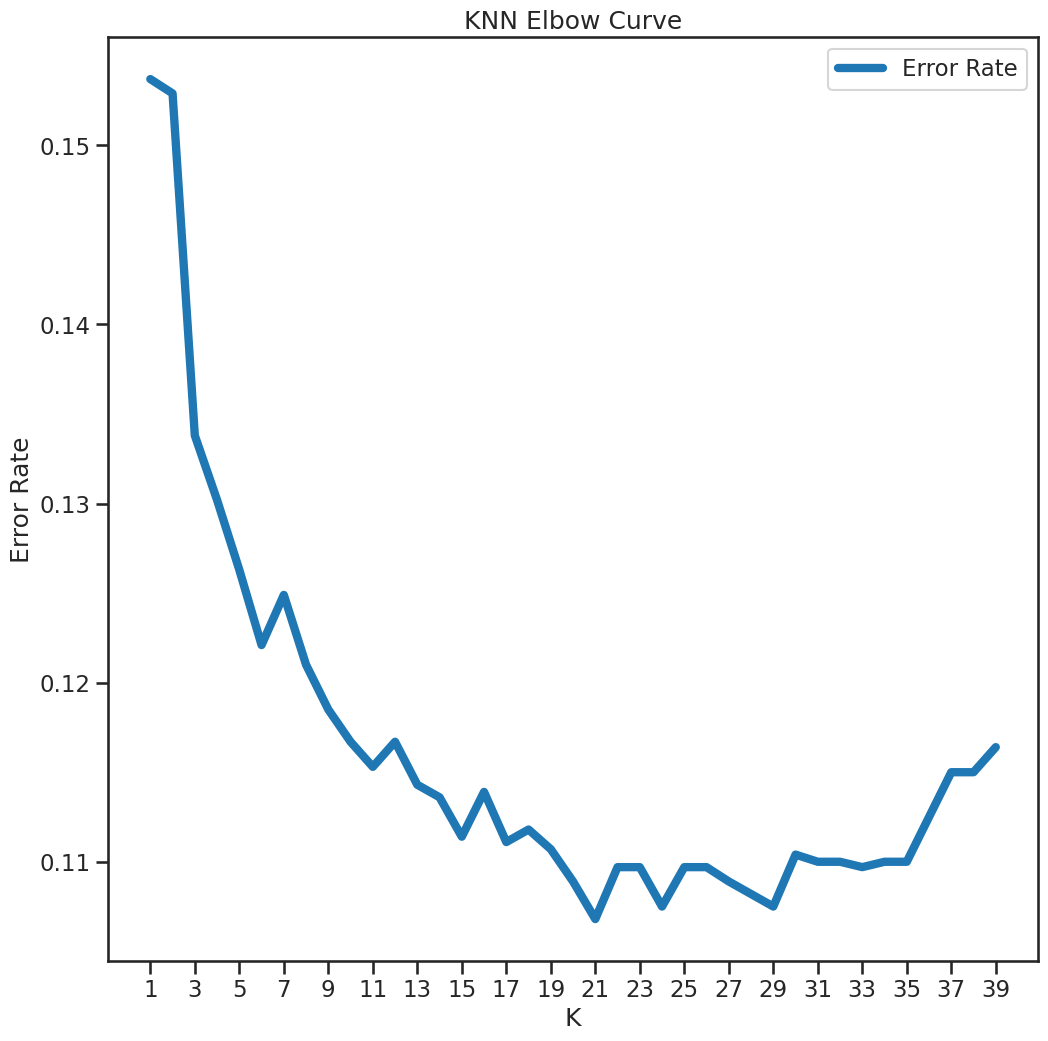

In [43]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

El gráfico muestra la **Curva del Codo (Elbow Curve)** para el algoritmo **K-Nearest Neighbors (KNN)**, en donde se analiza el **Error Rate (Tasa de error) en función de \( K \)**.

---

### **📌 Interpretación del gráfico**
1. **Eje X (\( K \))**: Representa los valores de \( K \) evaluados (de 1 a 40).
2. **Eje Y (Error Rate)**: Mide la tasa de error del modelo, es decir, la proporción de predicciones incorrectas (\( 1 - \) **Accuracy**).
3. **Tendencia**:
   - **Cuando \( K \) es muy pequeño (\( K = 1 \) a \( 5 \))**, el **error es alto**, lo que indica que el modelo está sobreajustando (**overfitting**).
   - **A medida que \( K \) aumenta, el error disminuye**, alcanzando un mínimo alrededor de **\( K \approx 20 - 30 \)**.
   - **Si \( K \) sigue aumentando, el error comienza a subir ligeramente**, lo que indica que el modelo está perdiendo capacidad predictiva y se está volviendo **demasiado generalizado (underfitting)**.

---

### **📌 Conclusión sobre el mejor \( K \)**
- **El "codo" del gráfico está alrededor de \( K = 20 \) a \( 30 \)**.  
  Este es el punto en donde la reducción del error empieza a estabilizarse, lo que indica el **mejor equilibrio entre sesgo y varianza**.
- Un \( K \) demasiado bajo causa **sobreajuste**, mientras que un \( K \) demasiado alto puede causar **subajuste**.

🔹 **Comparando con el gráfico de F1-Score:**  
- En el gráfico anterior, el F1-Score alcanzó su valor máximo en **\( K \approx 25 - 30 \)**.
- En este gráfico, el error también es mínimo en ese mismo rango.

✅ **Por lo tanto, un buen valor de \( K \) parece estar entre 25 y 30.** 🚀

### **Resumen: Implementación y Evaluación de K-Nearest Neighbors (KNN)**  

En esta sección, se implementa y evalúa el algoritmo **K-Nearest Neighbors (KNN)** utilizando datos preprocesados para predecir la pérdida de clientes.  

---

### **📌 Pasos del Análisis**  

1️⃣ **División del Conjunto de Datos**  
- Se separan las características (**X**) y la variable objetivo (**y**), donde la variable objetivo representa la pérdida de clientes.  
- Se usa `train_test_split` con un **40% de los datos para prueba** y el resto para entrenamiento.  

2️⃣ **Entrenamiento del Modelo con \( K = 3 \)**  
- Se inicia un **KNN con \( K = 3 \)** y se entrena con los datos de entrenamiento.  
- Se generan predicciones en el conjunto de prueba y se evalúan con métricas como **precisión, F1-Score y matriz de confusión**.  

3️⃣ **Evaluación del Modelo**  
- Se usa un **informe de clasificación** para analizar precisión, recall y F1-Score.  
- Se visualiza la **matriz de confusión**, donde se identifican los errores de predicción.  
- El modelo muestra una precisión del **86%** y revela un **desbalance en la clase de pérdida de clientes**.  

4️⃣ **Ajuste del Valor de \( K \)**  
- Se prueba con **\( K = 5 \)**, lo que mejora la **precisión y el F1-Score**.  
- La matriz de confusión muestra una mejor predicción para ambas clases.  

5️⃣ **Optimización del Valor de \( K \)**  
- Se prueba \( K \) en un rango de **1 a 40**.  
- Se grafican la **puntuación F1 y la tasa de error** para identificar el mejor \( K \).  
- Se encuentra que el mejor valor de \( K \) está **alrededor de 19-21**, donde la F1-Score es máxima y el error es mínimo.  

---

### **📌 Conclusión**  
El experimento demuestra cómo **elegir el mejor \( K \)** mediante prueba y análisis gráfico. Se concluye que valores de **\( K \) muy pequeños causan sobreajuste, mientras que valores grandes reducen la precisión**. 🚀

---
### Machine Learning Foundation (C) 2020 IBM Corporation
